In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### What keyword was the most popular?

In [5]:
# First let's load only keywords column from the data and clean the null elements 
kword = df['keywords']
# 5 row view what is in the keywords
len(kword)

10866

> As we can see keywords row include many different words with seaparated with "|" 
Since our plan is to count each word frequency in search we need to count them one bye one. Thus I created simple function for counting occurrences for each word 

In [3]:
def occur_count(kword):
    a = []
    for i in range(len(kword)):
        lis = str(kword[i]).split('|')

        for j in range(len(lis)):
            a.append(lis[j])
    return a     

In [ ]:
a = occur_count(kword)


In [9]:
# save occurences count from function
a = occur_count(kword)
# extract occurrences and keywords 
def top_occurs(l, top):
    keywords, occurrences = np.unique(l, return_counts = True)

    # save to dataframe for conveneince use 
    data  = {'occurrences': occurrences, 'keywords': keywords}
    df_keywords = pd.DataFrame(data)

    top10_occurrences = df_keywords.sort_values('occurrences', ascending = False)[1:top]
    return top10_occurrences


In [ ]:
plt.bar(top10_occurrences['keywords'], top10_occurrences['occurrences']);
plt.xticks(rotation=90);

In [ ]:
df.info()

### 2. Occurrences of genres

In [12]:
genres = df['genres']
g = occur_count(genres)
#print(g)
top10_genres = top_occurs(g, 10)
top10_genres

,occurrences,keywords
3,3793,Comedy
17,2908,Thriller
0,2385,Action
14,1712,Romance
11,1637,Horror
1,1471,Adventure
4,1355,Crime
7,1231,Family
15,1230,Science Fiction


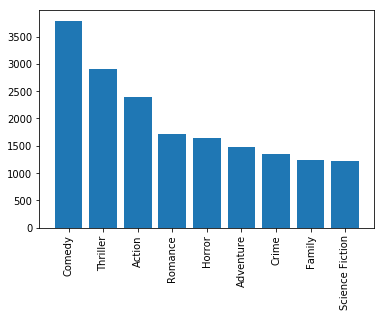

In [13]:
plt.bar(top10_genres['keywords'], top10_genres['occurrences']);
plt.xticks(rotation=90);

## what movie is the most voted?

In [31]:
votes = df[['original_title', 'vote_count']]
votes.sort_values('vote_count', ascending = False)[1:10]

,original_title,vote_count
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375
4382,The Hunger Games,7080
5425,Iron Man 3,6882
4363,The Dark Knight Rises,6723
629,Interstellar,6498
4367,The Hobbit: An Unexpected Journey,6417


## Correlation between popularity vs budget

In [42]:
pop_budget = df[['budget', 'popularity']]
pop_budget.corr(method = 'pearson')


budget        3.091321e+07
popularity    1.000185e+00
dtype: float64

In [60]:
def correlation(x, y):
    x = (x - x.mean())/x.std(ddof=0)
    y = (y - y.mean())/y.std(ddof=0)
    return x, y

budget, popularity = correlation(pop_budget['budget'], pop_budget['popularity'])



In [82]:
plt.scatter(budget)

TypeError: scatter() missing 1 required positional argument: 'y'

## Which company make more money ( top 20)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [70]:
df[['director', 'popularity', 'production_companies', '']]

,director,popularity,production_companies
0,Colin Trevorrow,32.985763,Universal Studios|Amblin Entertainment|Legenda...
1,George Miller,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...
2,Robert Schwentke,13.112507,Summit Entertainment|Mandeville Films|Red Wago...
3,J.J. Abrams,11.173104,Lucasfilm|Truenorth Productions|Bad Robot
4,James Wan,9.335014,Universal Pictures|Original Film|Media Rights ...
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,9.110700,Regency Enterprises|Appian Way|CatchPlay|Anony...
6,Alan Taylor,8.654359,Paramount Pictures|Skydance Productions
7,Ridley Scott,7.667400,Twentieth Century Fox Film Corporation|Scott F...
8,Kyle Balda|Pierre Coffin,7.404165,Universal Pictures|Illumination Entertainment
9,Pete Docter,6.326804,Walt Disney Pictures|Pixar Animation Studios|W...


## Budget change per year

In [92]:
y = df[['release_year', 'budget']]
y


,release_year,budget
0,2015,150000000
1,2015,150000000
2,2015,110000000
3,2015,200000000
4,2015,190000000
5,2015,135000000
6,2015,155000000
7,2015,108000000
8,2015,74000000
9,2015,175000000


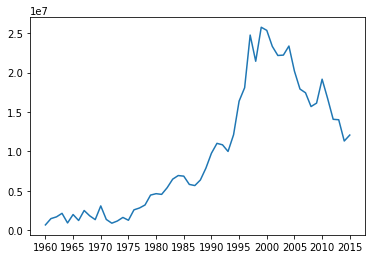

In [88]:
bud = y.groupby('release_year')['budget'].mean()
plt.xticks(np.arange(1960, 2020, 5))
plt.plot(bud)


In [123]:
b = df[['release_year', 'budget']]
b.query('release_year == 2015').mean()

release_year    2.015000e+03
budget          1.207718e+07
dtype: float64

In [74]:
years = df['release_year']
budget = df['budget']
start = years.min()
end = years.max()


            
